### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [54]:
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [49]:
data = pd.read_csv('data/coupons.csv')

In [36]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [38]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [39]:
# print Unique values for each column
for c in data.columns.sort_values():
    values = data[c].value_counts().index.tolist()
    str_values = ", ".join([str(v) for v in values])
    print(f"- {c.capitalize()}: {str_values}")

- Bar: never, less1, 1~3, 4~8, gt8
- Carryaway: 1~3, 4~8, less1, gt8, never
- Coffeehouse: less1, 1~3, never, 4~8, gt8
- Restaurant20to50: less1, 1~3, never, 4~8, gt8
- Restaurantlessthan20: 1~3, 4~8, less1, gt8, never
- Y: 1, 0
- Age: 21, 26, 31, 50plus, 36, 41, 46, below21
- Car: Scooter and motorcycle, Mazda5, do not drive, crossover, Car that is too old to install Onstar :D
- Coupon: Coffee House, Restaurant(<20), Carry out & Take away, Bar, Restaurant(20-50)
- Destination: No Urgent Place, Home, Work
- Direction_opp: 1, 0
- Direction_same: 0, 1
- Education: Some college - no degree, Bachelors degree, Graduate degree (Masters or Doctorate), Associates degree, High School Graduate, Some High School
- Expiration: 1d, 2h
- Gender: Female, Male
- Has_children: 0, 1
- Income: $25000 - $37499, $12500 - $24999, $37500 - $49999, $100000 or More, $50000 - $62499, Less than $12500, $87500 - $99999, $75000 - $87499, $62500 - $74999
- Maritalstatus: Married partner, Single, Unmarried partner, 

3. Decide what to do about your missing data -- drop, replace, other...

In [50]:
# check duplicate rows and delete if exists
print("Shape of dataset before data cleaning:",data.shape)
duplicate = data[data.duplicated(keep = 'last')] 
if duplicate.empty == False:
    data = data.drop_duplicates()
    print("Shape of dataset after removing duplicates:",data.shape)
# Maping Y values to more readable format
data['Y_str'] = data.loc[:,'Y'].map({0: 'Rejected', 1: 'Accepted'})
# Drop the rows for non-drivers
non_drivers_index = data.query("car == 'do not drive'").index
data.drop(non_drivers_index, inplace=True)
print("Shape of dataset after removing non-drivers:",data.shape)
# Drop the car column
data = data.drop(columns=['car'])
print("Shape of dataset after removing car column:",data.shape)
# 
nan_percent = data.isnull().sum()*100/len(data)
nan_df = pd.DataFrame({'nan_count': data.isnull().sum(),'nan_per': nan_percent})
nan_df[nan_df.nan_count != 0]
data = data.dropna()
print("Shape of dataset after removing NaN rows:",data.shape)


Shape of dataset before data cleaning: (12684, 26)
Shape of dataset after removing duplicates: (12610, 26)
Shape of dataset after removing non-drivers: (12588, 27)
Shape of dataset after removing car column: (12588, 26)
Shape of dataset after removing NaN rows: (11985, 26)


4. What proportion of the total observations chose to accept the coupon?



In [33]:
accepted_rejected_count = data.groupby('Y')['Y'].count()
accepted_rejected_count
print('Rejected coupon% ',accepted_rejected_count[0],',',round(accepted_rejected_count[0]/data.shape[0]*100,3),'%')
print('Accepted coupon% ',accepted_rejected_count[1],',',round(accepted_rejected_count[1]/data.shape[0]*100,3),'%')


Rejected coupon%  12 , 54.545 %
Accepted coupon%  10 , 45.455 %


5. Use a bar plot to visualize the `coupon` column.

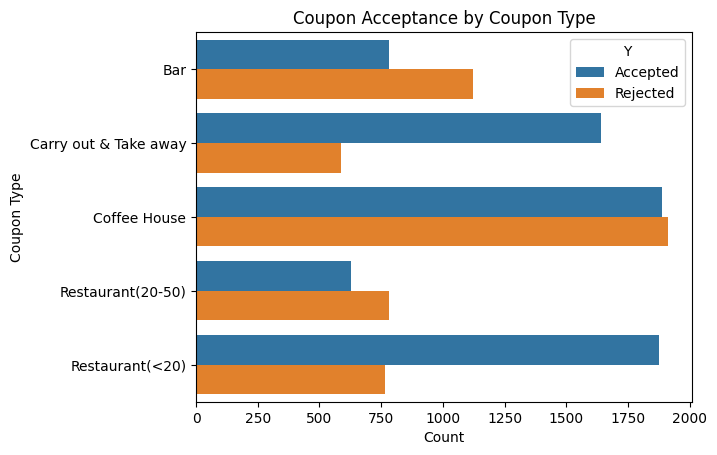

In [17]:
coupons = data.groupby(['coupon','Y_str']).count()['weather'].reset_index(name='count')
graph = sns.barplot(data=coupons, x='count', y='coupon', hue='Y_str')
graph.set(xlabel='Count', ylabel='Coupon Type')
plt.title('Coupon Acceptance by Coupon Type')
plt.legend(title='Y')
plt.savefig('images/coupon_barplot.png',bbox_inches='tight')


6. Use a histogram to visualize the temperature column.

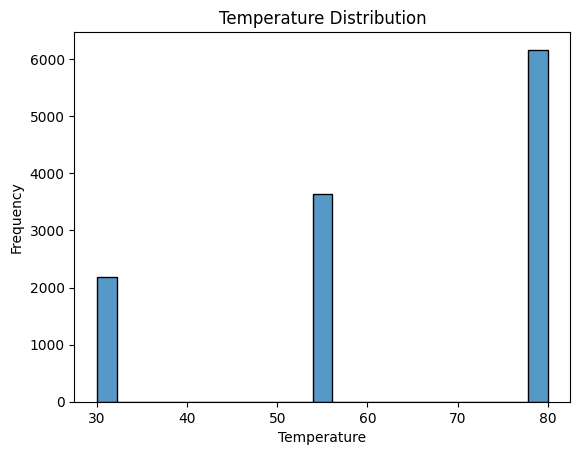

In [18]:
sns.histplot(data['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.savefig('images/temperature_histplot.png',bbox_inches='tight')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
bar_df = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [27]:
bar_coupon = bar_df.groupby('Y')['Y'].count()
print('Rejected Bar Coupon % ',bar_coupon[0],',',round(bar_coupon[0]/bar_df.shape[0]*100,3),'%')
print('Accepted Bar Coupon % ',bar_coupon[1],',',round(bar_coupon[1]/bar_df.shape[0]*100,3),'%')


Rejected Bar Coupon %  1121 , 58.876 %
Accepted Bar Coupon %  783 , 41.124 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [62]:
# - Bar: never, less1, 1~3, 4~8, gt8
less_than_3 = ['never', 'less1', '1~3']
less_than_3_go2bar = bar_df.query("Bar in @less_than_3").count()['Y']
more_than_3_go2bar = bar_df.query("Bar not in @less_than_3").count()['Y']

less_than_3_acceptance = bar_df.query("Y == 1 and Bar in @less_than_3").count()['Y']
more_than_3_acceptance = bar_df.query("Y == 1 and Bar not in @less_than_3").count()['Y']
rate_of_acceptance_for_l3 = round(less_than_3_acceptance/less_than_3_go2bar*100,2)
rate_of_acceptance_for_g3 = round(more_than_3_acceptance/more_than_3_go2bar*100,2)

print(f"Less than 3 times is {rate_of_acceptance_for_l3}%")
print(f"More than 3 times is {rate_of_acceptance_for_g3}%")

Less than 3 times is 37.24%
More than 3 times is 75.92%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [63]:
# - Age: 21, 26, 31, 50plus, 36, 41, 46, below21
# - Bar: never, less1, 1~3, 4~8, gt8
more_than_25 = ['26', '31', '36', '41', '46', '50plus']
bar_more_than_once = ['1~3', '4~8', 'gt8']
more_than_25_go2bar = bar_df.query("age in @more_than_25 and Bar in @bar_more_than_once").count()['Y']
others_go2bar = bar_df.query("age not in @more_than_25").count()['Y']
accepted_more_than_25 = bar_df.query("Y == 1 and age in @more_than_25 and Bar in @bar_more_than_once").count()['Y']
accepted_others = bar_df.query("Y == 1 and age not in @more_than_25").count()['Y']
rate_of_acceptance_for_m25 = round(accepted_more_than_25/more_than_25_go2bar*100,2)
rate_of_acceptance_for_others = round(accepted_others/others_go2bar*100,2)
print(f"Age is more than 25 is {rate_of_acceptance_for_m25}%")
print(f"Age is less than 25 {rate_of_acceptance_for_others}%")
print("Yes, Younger people are less likely to accept the Bar coupon")

Age is more than 25 is 68.83%
Age is less than 25 48.95%
Yes, Younger people are less likely to accept the Bar coupon


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [54]:
# Occupation: Unemployed, Student, Computer & Mathematical, Sales & Related, Education&Training&Library, Management, Office & Administrative Support, Arts Design Entertainment Sports & Media, Business & Financial, Retired, Food Preparation & Serving Related, Healthcare Practitioners & Technical, Healthcare Support, Community & Social Services, Legal, Transportation & Material Moving, Architecture & Engineering, Personal Care & Service, Protective Service, Life Physical Social Science, Construction & Extraction, Installation Maintenance & Repair, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
# Passanger: Alone, Friend(s), Partner, Kid(s)
kids = ['Kid(s)']
occupation = ['farming, fishing, or forestry']
bar_freq_less_than_1 = ['never', 'less1']
less_than_1_go2bar = bar_df.query("Bar not in @bar_freq_less_than_1 and passanger not in @kids and occupation not in @occupation").count()['Y']
acceptance_less_than_3_go2bar = bar_df.query("Y == 1 and Bar not in @bar_freq_less_than_1 and passanger not in @kids and occupation not in @occupation").count()['Y']
rate_of_acceptance_for_less_than_3 = round(acceptance_less_than_3_go2bar/less_than_1_go2bar*100,2)
print(f"The Rate of acceptance  {rate_of_acceptance_for_less_than_3}%")

The Rate of acceptance  70.83%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [61]:
# Maritalstatus: Married partner, Single, Unmarried partner, Divorced, Widowed
# Age: 21, 26, 31, 50plus, 36, 41, 46, below21
# - Restaurantlessthan20: 1~3, 4~8, less1, gt8, never
# Income: $25000 - $37499, $12500 - $24999, $37500 - $49999, $100000 or More, $50000 - $62499, Less than $12500, $87500 - $99999, $75000 - $87499, $62500 - $74999
marital_status = ['Widowed']
non_widowed_lt1_go2bar = bar_df.query("Bar not in @bar_freq_less_than_1 and passanger not in @kids and maritalStatus not in @marital_status").count()['Y']
accepted_non_widowed_lt1 = bar_df.query("Y == 1 and Bar not in @bar_freq_less_than_1 and passanger not in @kids and maritalStatus not in @marital_status").count()['Y']
rate_of_acceptance_for_non_widowed_lt1 = round(accepted_non_widowed_lt1/non_widowed_lt1_go2bar*100,2)
print(f"Non-widowed people is {rate_of_acceptance_for_non_widowed_lt1}%")
#
age_less_than_30 = ['below21','21', '26']
total_age_lt30 = bar_df.query("Bar not in @bar_freq_less_than_1 and age in @age_less_than_30").count()['Y']
accepted_age_lt30 = bar_df.query("Y == 1 and Bar not in @bar_freq_less_than_1 and age in @age_less_than_30").count()['Y']
rate_of_acceptance_for_age_lt30 = round(accepted_age_lt30/total_age_lt30*100,2)
print(f"Younger than 30 is {rate_of_acceptance_for_age_lt30}%")
#
cheap_restaurant_freq = ['4~8', 'gt8']
income_less_than_50 = ['$12500 - $24999','$25000 - $37499','$37500 - $49999']
total_income_lt50 = bar_df.query("RestaurantLessThan20 in @cheap_restaurant_freq and income in @income_less_than_50").count()['Y']
accepted_income_lt50 = bar_df.query("Y == 1 and RestaurantLessThan20 in @cheap_restaurant_freq and income in @income_less_than_50").count()['Y']
rate_of_acceptance_for_income_lt50 = round(accepted_income_lt50/total_income_lt50*100,2)
print(f"Income less than 50 is {rate_of_acceptance_for_income_lt50}%")


Non-widowed people is 70.83%
Younger than 30 is 71.78%
Income less than 50 is 46.15%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

    - Drivers who go to bars more than once a month have higher acceptance rate compared to others.
    - Younger people are less likely to accept the Bar coupon.
    - People with occupations other than farming, fishing, or forestry have higher acceptance rate compared to others.
    - Non-widowed people have higher acceptance rate compared to widowed ones.
    - Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K have lower acceptance rate compared to others.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### High Level Approach to analyse data for drivers accepting copons:
1. Determine coupons other than Bar are popular  
2. Analyize the data and to determine charatersitics of driver accepting popular coupon
#### Goal:
1. Understand and characteristics of coupon whos acceptance rate is high
### Approach
1. Determine which coupon acceptance rate is high
    - Group the data for all coupon types which are not Bar
2. Clean data
    - Remove duplicates
    - Remove or 
3. Identify the coupon acceptance rate
    - Calculate acceptance rate by different attributes like time of day, destination etc.
    - Plot acceptance rate by different attributes to visualize the acceptance rate
4. Draw conclusions from analysis
5. Present findings in report or presentation in markdown format


In [83]:
# Load the dataset again
all_data = pd.read_csv('data/Coupons.csv')

#### Data Cleanup

In [84]:
# Maping Y values to more readable format
all_data['Y_str'] = all_data.loc[:,'Y'].map({0: 'Rejected', 1: 'Accepted'})

# Filter Bar Coupons
non_bar_coupons = all_data.query("coupon != 'Bar'")
# check duplicate rows and delete if exists
print("Shape of dataset before data cleaning:",non_bar_coupons.shape)
duplicate = non_bar_coupons[non_bar_coupons.duplicated(keep = 'last')] 
if duplicate.empty == False:
    non_bar_coupons = non_bar_coupons.drop_duplicates()
    print("Shape of dataset after removing duplicates:",non_bar_coupons.shape)
# Drop the rows for non-drivers
non_drivers_index = non_bar_coupons.query("car == 'do not drive'").index
non_bar_coupons.drop(non_drivers_index, inplace=True)
print("Shape of dataset after removing non-drivers:",non_bar_coupons.shape)
# Drop the car column
non_bar_coupons = non_bar_coupons.drop(columns=['car'])
print("Shape of dataset after removing car column:",non_bar_coupons.shape)
# 
nan_percent = data.isnull().sum()*100/len(non_bar_coupons)
nan_df = pd.DataFrame({'nan_count': non_bar_coupons.isnull().sum(),'nan_per': nan_percent})
nan_df[nan_df.nan_count != 0]
non_bar_coupons = non_bar_coupons.dropna()
print("Shape of dataset after removing NaN rows:",non_bar_coupons.shape)


Shape of dataset before data cleaning: (10667, 27)
Shape of dataset after removing duplicates: (10600, 27)
Shape of dataset after removing non-drivers: (10580, 27)
Shape of dataset after removing car column: (10580, 26)
Shape of dataset after removing NaN rows: (10081, 26)


In [85]:
# Check which coupons have the lowest and highest acceptance rate
coupon_group = non_bar_coupons.groupby(['coupon', 'Y_str'])[['Y']].value_counts().reset_index(name='count')
coupon_group['Y_percentage'] = coupon_group.groupby('coupon')['count'].apply(lambda x: round(x/x.sum()*100,2)).reset_index()['count']
top_coupons = coupon_group.groupby(['coupon', 'Y_percentage']).sum().sort_values(by='Y_percentage', ascending=False)
top_coupons.reset_index(inplace=True)
most_popular_coupon = top_coupons.iloc[0, 0]
most_rejected_coupon = top_coupons.iloc[1, 0]
top_coupons
print(f"The coupons with lowest acceptance rate '{most_rejected_coupon}'")
print(f"The coupons with highest acceptance rate  '{most_popular_coupon}'")
if most_popular_coupon == most_rejected_coupon: 
    print("* * * * The lowest and highest acceptance rate coupons are the same")

The coupons with lowest acceptance rate 'Restaurant(<20)'
The coupons with highest acceptance rate  'Carry out & Take away'


In [103]:
# bar plot to display the acceptance/rejection rate of each coupon type
fig = px.bar(coupon_group, x='coupon', 
       y='Y_percentage', color='Y_str', 
       title='Coupon Acceptance Rate by Coupon Type (non Bar Coupons)', 
       labels={'coupon':'Coupon', 'Y_percentage': 'Percentage of Coupon Type'}, 
       barmode='group', text='Y_percentage')
fig.layout.legend.title = 'Coupon Acceptance'
fig.show()
fig.write_image("images/coupon_acceptance_rate.png")


#### Analyize Highest Acceptance Rate Coupons:
- Visvalize Highest Acceptance rate coupons: 
    - Age of Driver
    - Income of Driver
    - Education
    - Driving with Passanger
    - Weather


In [176]:
# Common function to generate aggregated data frame for column
def get_dataframe_by_column(data, column):
    column_df = data.query("coupon == @most_popular_coupon")
    column_df = column_df.groupby(['coupon', 'Y_str'])[['Y',column]].value_counts().reset_index(name='count')
    column_df['Y_percentage'] = column_df.groupby('coupon')['count'].apply(lambda x: round(x/x.sum()*100,2)).reset_index()['count']
    return column_df

# Common function to plot the acceptance rate by column
def plot_coupon_acceptance_rate_by_column(data, column):
    coupon_group = get_dataframe_by_column(data,column)
    fig = px.bar(coupon_group, y=f'{column}', 
           x='Y_percentage', color='Y_str', 
           title=f'Coupon Acceptance Rate by {column.capitalize()} for Coupon [{most_popular_coupon}]', 
           labels={f'{column}':f'{column.capitalize()}', 'Y_percentage': f'Percentage of Coupon [{most_popular_coupon}]'}, 
           barmode='group', text='Y_percentage')
    fig.layout.legend.title = 'Coupon Acceptance'
    fig.update_traces(texttemplate='%{text:.2s}')
    fig.show()
    fig.write_image(f"images/coupon_acceptance_rate_by_{column}.png")   


- Driver Age

In [177]:
plot_coupon_acceptance_rate_by_column(non_bar_coupons, 'age')

- Drivers Income 

In [178]:
plot_coupon_acceptance_rate_by_column(non_bar_coupons, 'income')

- Drivers Education

In [173]:
plot_coupon_acceptance_rate_by_column(non_bar_coupons, 'education')

- Driving with Pasanger

In [174]:
plot_coupon_acceptance_rate_by_column(non_bar_coupons, 'passanger')

- Weather 

In [175]:
plot_coupon_acceptance_rate_by_column(non_bar_coupons, 'weather')

### Observation
#### The coupon with highest acceptance rate is **Carry out & Take away**
    1. Age is a significant factor in the acceptance of the coupon Carry out & Take away. Drivers in the range of 21-26 most likely accept this coupon. 
    2. The income another significant factor in the acceptance of Carry out & Take away coupon. Drivers with income less than $37,500 have lower acceptance rate compared to others.
    3. Education plays a key factor in the acceptance of Carry out & Take away coupon. Drivers with less than high school education have lower acceptance rate compared to others
    4. If a driver is travaling alone the acceptance of Carry out & Take away coupon is higher with friends or family members
    5. Weatherher also plays a key role in the acceptance of Carry out & Take away coupon. Drivers are more likely to accept coupons on clear weather compared to other weather conditions